# Demonstrate adding day and night to a scada dataframe

This notebook shows how, given lat/long and UTC time, a column with a boolean is_day value is added
This can be useful for a quick partinioning of the data into these two bins

In [3]:

from pathlib import Path
import pandas as pd


from flasc.dataframe_operations.dataframe_manipulations import is_day_or_night, plot_sun_altitude_with_day_night_color


# Step 0: Load processed data and reduce to first 5000 rows

Load the processed SCADA data with power curve filtering and northing calibration applied and inspect

In [4]:

root_path = Path.cwd()
f = root_path / "postprocessed" / "df_scada_data_60s_filtered_and_northing_calibrated.ftr"
df_scada = pd.read_feather(f)

# To make plots easier to read, limit to first 5000 points
df_scada = df_scada.iloc[:5000]

## Add is_day flag

Use the approximate lat/long of the wind farm to identify day/night using sun altitude

In [5]:
latitude = 49.8435
longitude = 2.801556

df_scada = is_day_or_night(df_scada, 
                    latitude, 
                    longitude)


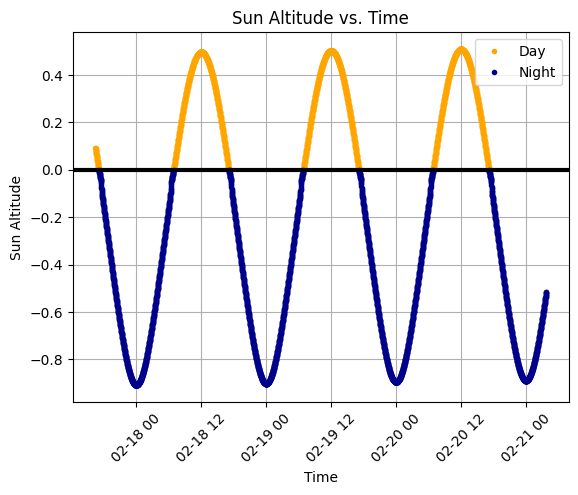

In [6]:
# Plot the day/night columns
plot_sun_altitude_with_day_night_color(df_scada)

## Use the ability to add a time lag

In this example set day as 1 hour after sunrse, and night as 1 hour after sunset

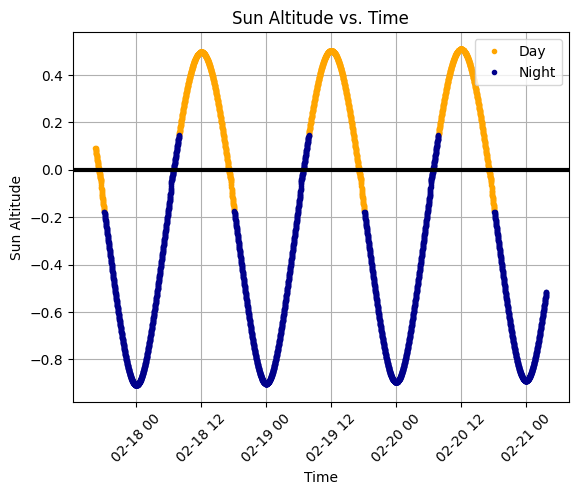

In [7]:
# Try using the lag hour to define daytime as starting 1 hour after dawn
df_scada = is_day_or_night(df_scada, 
                    latitude, 
                    longitude,
                    lag_hours=1)

plot_sun_altitude_with_day_night_color(df_scada)